# Eksperimen Machine Learning - Titanic Survival Prediction
# Nama: Muhammad Rizki
# Dataset: [Kaggle - Heart Failure Prediction](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)


# **1. Perkenalan Dataset**


Dataset ini berjudul **Heart Failure Prediction**, tersedia di Kaggle melalui tautan berikut: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).

Dataset ini berisi informasi kesehatan pasien yang digunakan untuk memprediksi kemungkinan gagal jantung. Setiap baris mewakili satu pasien dengan beberapa fitur medis seperti usia, jenis kelamin, tekanan darah, kolesterol, dan lain-lain, serta label target berupa indikasi apakah pasien tersebut berisiko mengalami gagal jantung atau tidak.

### Tujuan
Tujuan utama dari penggunaan dataset ini adalah untuk membangun model prediksi yang dapat mengidentifikasi pasien dengan risiko gagal jantung berdasarkan fitur-fitur medis yang tersedia.

### Fitur dalam Dataset:
- **Age**: Usia pasien (dalam tahun)
- **Sex**: Jenis kelamin pasien (1 = pria, 0 = wanita)
- **ChestPainType**: Jenis nyeri dada (ATA, NAP, ASY, TA)
- **RestingBP**: Tekanan darah saat istirahat (mm Hg)
- **Cholesterol**: Kadar kolesterol serum (mm/dl)
- **FastingBS**: Gula darah puasa > 120 mg/dl (1 = true, 0 = false)
- **RestingECG**: Hasil elektrokardiogram saat istirahat (Normal, ST, LVH)
- **MaxHR**: Detak jantung maksimum yang dicapai
- **ExerciseAngina**: Nyeri dada akibat olahraga (Y = ya, N = tidak)
- **Oldpeak**: Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat
- **ST_Slope**: Kemiringan segmen ST (Up, Flat, Down)
- **HeartDisease**: Target/label (1 = memiliki penyakit jantung, 0 = tidak)

### Ukuran Dataset:
- Jumlah baris: 918
- Jumlah kolom: 12

Dataset ini cocok digunakan untuk eksplorasi data, visualisasi, serta penerapan berbagai algoritma machine learning untuk klasifikasi biner.


# **2. Import Library**

In [11]:
# =====================================
# 1. SETUP DAN INSTALASI DEPENDENCIES
# =====================================

# Install kaggle untuk download dataset
!pip install -q kaggle

# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import os
import shutil

# Setup untuk plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Dependencies berhasil diinstall dan diimport")

✅ Dependencies berhasil diinstall dan diimport



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [15]:
# =====================================
# 3. DATA LOADING
# =====================================

# Load dataset
df = pd.read_csv('../heart-failure-prediction/heart.csv')
print(f"📊 Dataset berhasil dimuat dengan shape: {df.shape}")
print(f"📈 Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom")

# Display informasi dasar dataset
print("\n" + "="*50)
print("INFORMASI DASAR DATASET")
print("="*50)
print(f"Nama Dataset: Heart Failure Prediction Dataset")
print(f"Jumlah Sampel: {df.shape[0]}")
print(f"Jumlah Fitur: {df.shape[1]}")
print(f"Target Variable: HeartDisease (0: No Heart Disease, 1: Heart Disease)")

📊 Dataset berhasil dimuat dengan shape: (918, 12)
📈 Dataset memiliki 918 baris dan 12 kolom

INFORMASI DASAR DATASET
Nama Dataset: Heart Failure Prediction Dataset
Jumlah Sampel: 918
Jumlah Fitur: 12
Target Variable: HeartDisease (0: No Heart Disease, 1: Heart Disease)


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [16]:
# =====================================
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# =====================================

print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("="*50)

# 4.1 Informasi Dataset
print("\n📋 INFO DATASET:")
print(df.info())

# 4.2 Statistik Deskriptif
print("\n📊 STATISTIK DESKRIPTIF:")
print(df.describe())

# 4.3 Cek Missing Values
print("\n🔍 MISSING VALUES:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"Total missing values: {missing_values.sum()}")

# 4.4 Cek Duplicated Data
print(f"\n🔄 DUPLICATED DATA:")
duplicated_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicated_count}")

# 4.5 Unique Values per Column
print("\n🎯 UNIQUE VALUES PER COLUMN:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# 4.6 Target Variable Distribution
print("\n📈 DISTRIBUSI TARGET VARIABLE:")
target_dist = df['HeartDisease'].value_counts()
print(target_dist)
print(f"Persentase Heart Disease: {(target_dist[1]/len(df)*100):.2f}%")
print(f"Persentase No Heart Disease: {(target_dist[0]/len(df)*100):.2f}%")



EXPLORATORY DATA ANALYSIS (EDA)

📋 INFO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

📊 STATISTIK DESKRIPTIF:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.0000


DATA VISUALIZATION


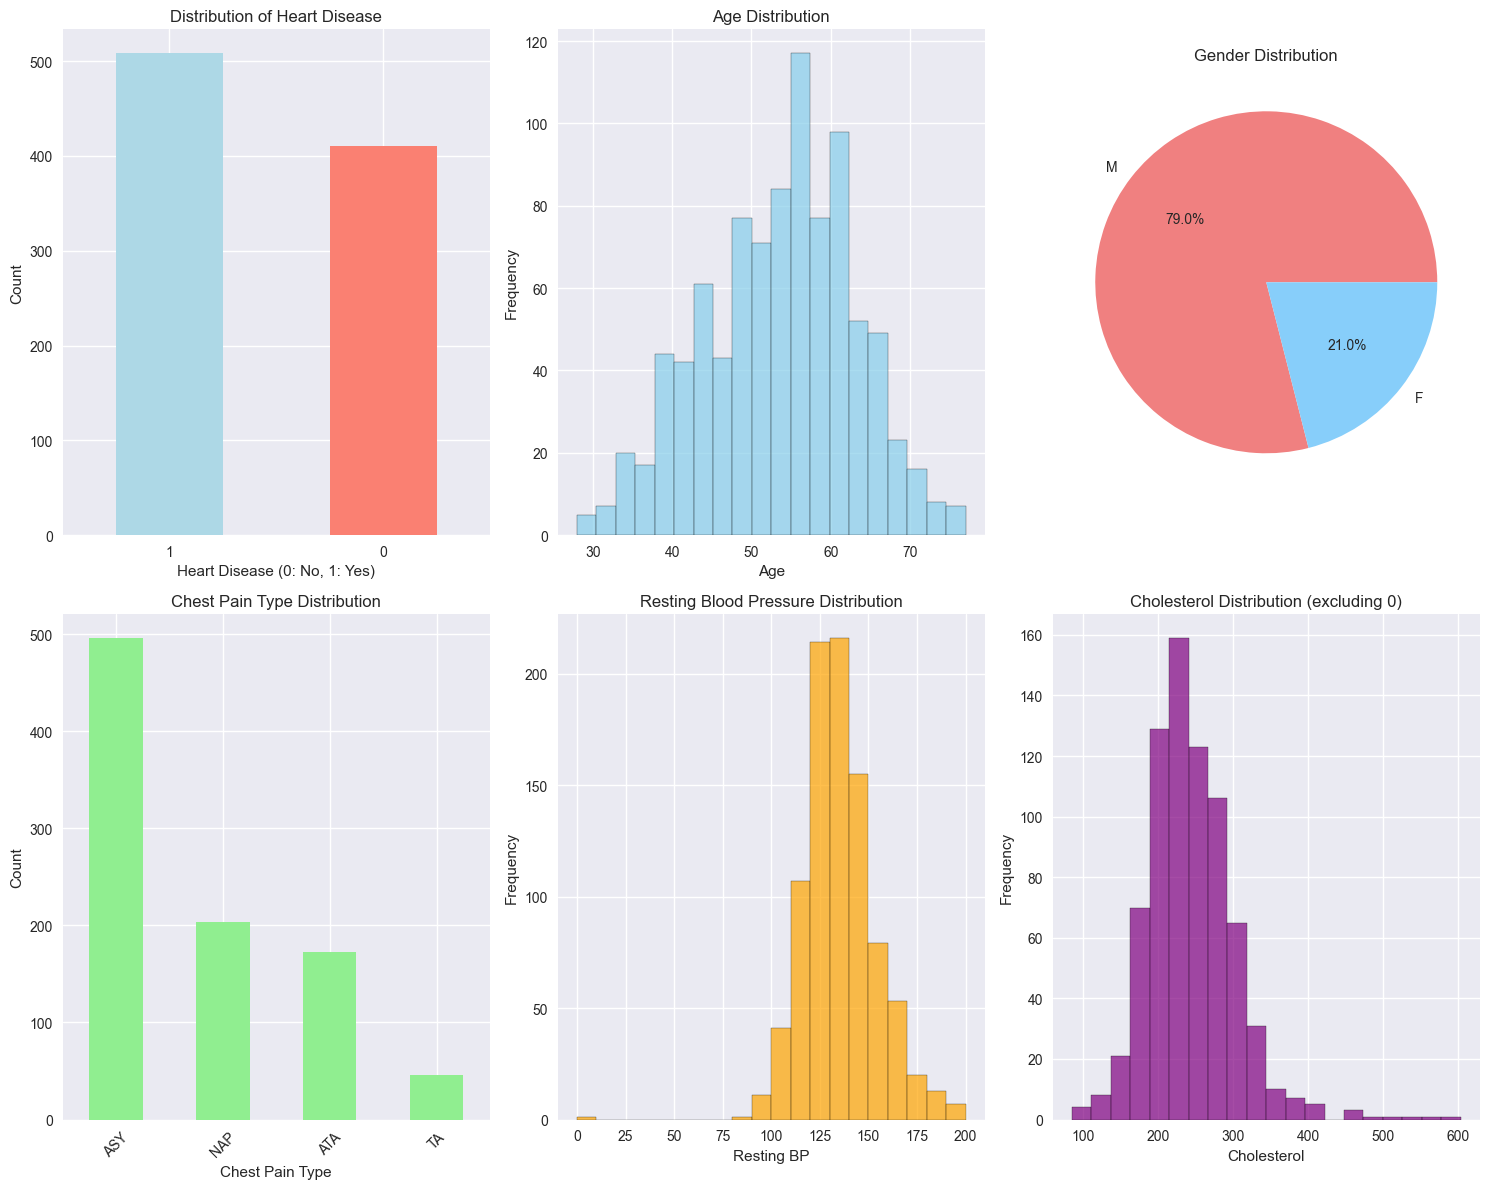

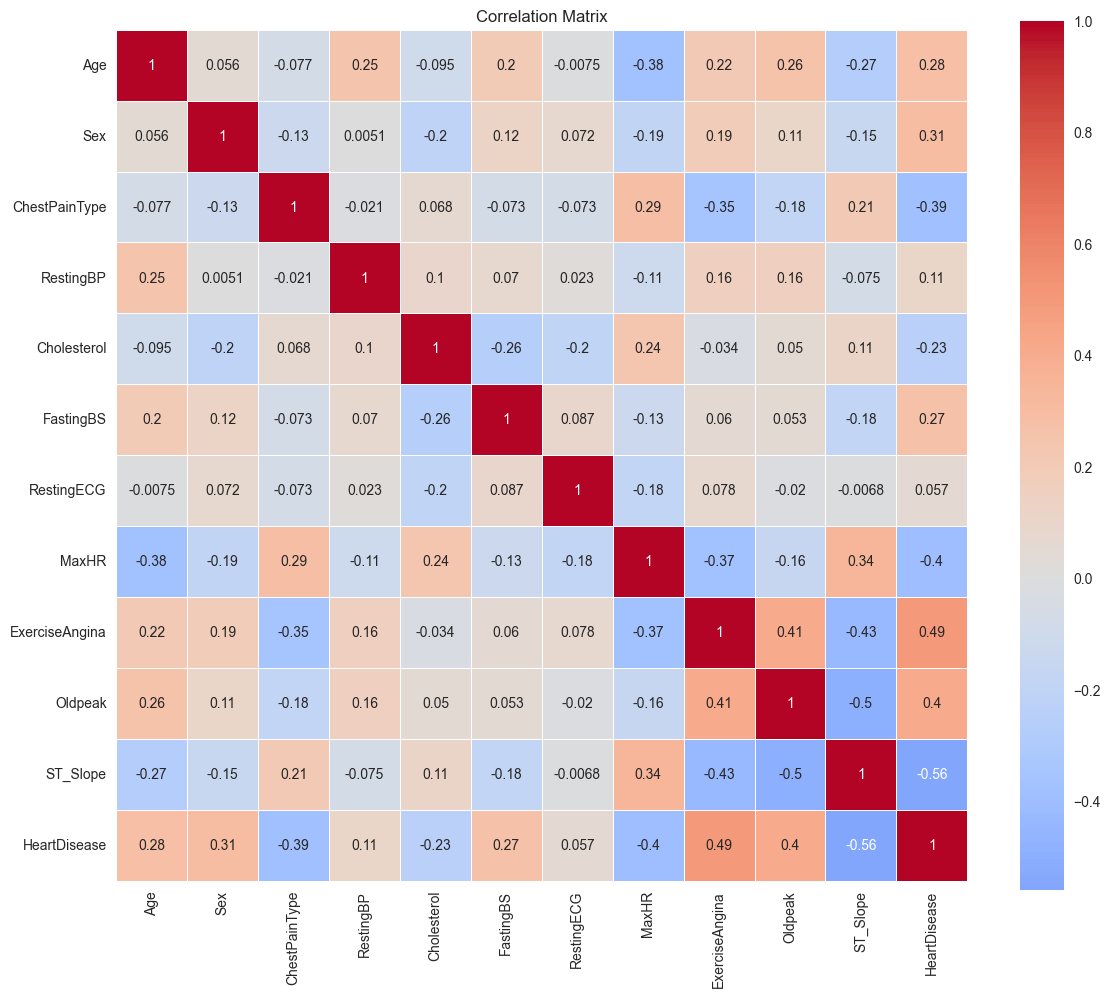

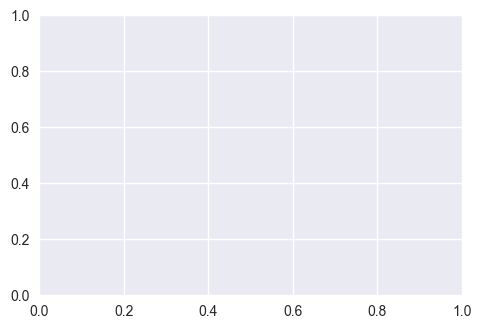

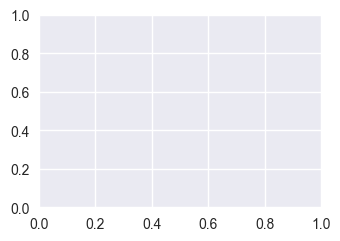

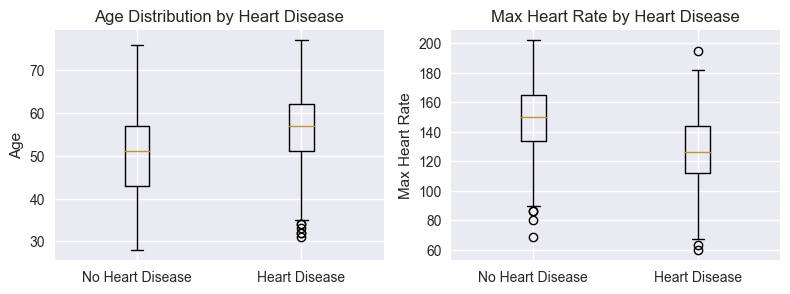

In [17]:
# =====================================
# 5. DATA VISUALIZATION
# =====================================

print("\n" + "="*50)
print("DATA VISUALIZATION")
print("="*50)

# 5.1 Target Variable Distribution
plt.figure(figsize=(15, 12))

# Subplot 1: Target Distribution
plt.subplot(2, 3, 1)
df['HeartDisease'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 5.2 Age Distribution
plt.subplot(2, 3, 2)
plt.hist(df['Age'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 5.3 Gender Distribution
plt.subplot(2, 3, 3)
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution')
plt.ylabel('')

# 5.4 Chest Pain Type Distribution
plt.subplot(2, 3, 4)
df['ChestPainType'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 5.5 Resting BP Distribution
plt.subplot(2, 3, 5)
plt.hist(df['RestingBP'], bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting BP')
plt.ylabel('Frequency')

# 5.6 Cholesterol Distribution
plt.subplot(2, 3, 6)
plt.hist(df[df['Cholesterol'] > 0]['Cholesterol'], bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.title('Cholesterol Distribution (excluding 0)')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 5.7 Correlation Matrix
plt.figure(figsize=(12, 10))
# Encode categorical variables untuk correlation
df_encoded = df.copy()
le = LabelEncoder()
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 5.8 Heart Disease by Gender
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
pd.crosstab(df['Sex'], df['HeartDisease']).plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=0)

# 5.9 Heart Disease by Chest Pain Type
plt.subplot(2, 2, 2)
pd.crosstab(df['ChestPainType'], df['HeartDisease']).plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=45)

# 5.10 Age vs Heart Disease
plt.subplot(2, 2, 3)
plt.boxplot([df[df['HeartDisease']==0]['Age'], df[df['HeartDisease']==1]['Age']], 
            labels=['No Heart Disease', 'Heart Disease'])
plt.title('Age Distribution by Heart Disease')
plt.ylabel('Age')

# 5.11 MaxHR vs Heart Disease
plt.subplot(2, 2, 4)
plt.boxplot([df[df['HeartDisease']==0]['MaxHR'], df[df['HeartDisease']==1]['MaxHR']], 
            labels=['No Heart Disease', 'Heart Disease'])
plt.title('Max Heart Rate by Heart Disease')
plt.ylabel('Max Heart Rate')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [18]:
# =====================================
# 6. DATA PREPROCESSING
# =====================================

print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# 6.1 Handle Missing Values
print("🔧 HANDLING MISSING VALUES:")
print("Dataset ini tidak memiliki missing values yang eksplisit.")
print("Namun, terdapat nilai 0 pada kolom Cholesterol dan RestingBP yang mungkin tidak valid.")

# Cek nilai 0 yang tidak masuk akal
print(f"\nJumlah nilai 0 pada Cholesterol: {(df['Cholesterol'] == 0).sum()}")
print(f"Jumlah nilai 0 pada RestingBP: {(df['RestingBP'] == 0).sum()}")

# Buat copy dataset untuk preprocessing
df_processed = df.copy()

# 6.2 Handle Cholesterol = 0 (replace with median)
cholesterol_median = df_processed[df_processed['Cholesterol'] > 0]['Cholesterol'].median()
df_processed.loc[df_processed['Cholesterol'] == 0, 'Cholesterol'] = cholesterol_median
print(f"✅ Replaced {(df['Cholesterol'] == 0).sum()} zero values in Cholesterol with median: {cholesterol_median}")

# 6.3 Handle RestingBP = 0 (replace with median)
if (df_processed['RestingBP'] == 0).sum() > 0:
    restingbp_median = df_processed[df_processed['RestingBP'] > 0]['RestingBP'].median()
    df_processed.loc[df_processed['RestingBP'] == 0, 'RestingBP'] = restingbp_median
    print(f"✅ Replaced {(df['RestingBP'] == 0).sum()} zero values in RestingBP with median: {restingbp_median}")

# 6.4 Remove Duplicates
initial_shape = df_processed.shape[0]
df_processed = df_processed.drop_duplicates()
final_shape = df_processed.shape[0]
print(f"✅ Removed {initial_shape - final_shape} duplicate rows")

# 6.5 Encode Categorical Variables
print("\n🏷️ ENCODING CATEGORICAL VARIABLES:")
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# One-hot encoding untuk variabel dengan lebih dari 2 kategori
df_encoded = pd.get_dummies(df_processed, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], 
                           prefix=['ChestPain', 'RestingECG', 'ST_Slope'])

# Label encoding untuk variabel binary
label_encoders = {}
binary_columns = ['Sex', 'ExerciseAngina']
for col in binary_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"✅ Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print(f"\n📊 Dataset setelah encoding: {df_encoded.shape}")

# 6.6 Feature Scaling
print("\n⚖️ FEATURE SCALING:")
# Pisahkan features dan target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Identifikasi kolom numerik yang perlu di-scale
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()

# Scale numerical features
X_scaled = X.copy()
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])

print(f"✅ Scaled numerical features: {numerical_columns}")
print(f"📊 Final dataset shape: {X_scaled.shape}")

# 6.7 Train-Test Split
print("\n🔀 TRAIN-TEST SPLIT:")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42, stratify=y)
print(f"✅ Training set: {X_train.shape[0]} samples")
print(f"✅ Testing set: {X_test.shape[0]} samples")
print(f"✅ Target distribution in training set:")
print(y_train.value_counts(normalize=True))


DATA PREPROCESSING
🔧 HANDLING MISSING VALUES:
Dataset ini tidak memiliki missing values yang eksplisit.
Namun, terdapat nilai 0 pada kolom Cholesterol dan RestingBP yang mungkin tidak valid.

Jumlah nilai 0 pada Cholesterol: 172
Jumlah nilai 0 pada RestingBP: 1
✅ Replaced 172 zero values in Cholesterol with median: 237.0
✅ Replaced 1 zero values in RestingBP with median: 130.0
✅ Removed 0 duplicate rows

🏷️ ENCODING CATEGORICAL VARIABLES:
✅ Encoded Sex: {'F': 0, 'M': 1}
✅ Encoded ExerciseAngina: {'N': 0, 'Y': 1}

📊 Dataset setelah encoding: (918, 19)

⚖️ FEATURE SCALING:
✅ Scaled numerical features: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
📊 Final dataset shape: (918, 18)

🔀 TRAIN-TEST SPLIT:
✅ Training set: 734 samples
✅ Testing set: 184 samples
✅ Target distribution in training set:
HeartDisease
1    0.553134
0    0.446866
Name: proportion, dtype: float64


In [6]:
# # =====================================
# # 7. SIMPLE MODEL TRAINING
# # =====================================

# print("\n" + "="*50)
# print("SIMPLE MODEL TRAINING (CONTOH)")
# print("="*50)

# # Train simple Random Forest model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# # Make predictions
# y_pred = rf_model.predict(X_test)

# # Evaluate model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"🎯 Model Accuracy: {accuracy:.4f}")

# # Feature importance
# feature_importance = pd.DataFrame({
#     'feature': X_train.columns,
#     'importance': rf_model.feature_importances_
# }).sort_values('importance', ascending=False)

# print("\n📊 TOP 10 FEATURE IMPORTANCE:")
# print(feature_importance.head(10))


=== MENYIMPAN DATA ===
Data final shape: (119, 9)
Data siap untuk training model!
Data tersimpan sebagai 'iris_preprocessed.csv'
Scaler dan Label Encoder tersimpan!

=== RINGKASAN PREPROCESSING ===
1. ✅ Data Loading: Dataset Iris berhasil dimuat
2. ✅ EDA: Eksplorasi data completed
3. ✅ Preprocessing:
   - Duplicate removal
   - Missing value handling
   - Outlier treatment
   - Feature engineering (4 features baru)
   - Categorical encoding
   - Feature scaling
4. ✅ Data siap untuk machine learning!

Final dataset shape: (119, 9)
Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'petal_sepal_length_ratio', 'petal_sepal_width_ratio', 'sepal_area', 'petal_area']
Target: target


In [19]:
# =====================================
# 8. SAVE PROCESSED DATA
# =====================================

print("\n" + "="*50)
print("SAVING PROCESSED DATA")
print("="*50)

# Save processed dataset
df_processed.to_csv('heart_disease_processed.csv', index=False)
print("✅ Processed dataset saved as 'heart_disease_processed.csv'")

# Save train-test split
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
print("✅ Train-test split saved as separate CSV files")


SAVING PROCESSED DATA
✅ Processed dataset saved as 'heart_disease_processed.csv'
✅ Train-test split saved as separate CSV files


In [20]:
# =====================================
# 9. SUMMARY
# =====================================

print("\n" + "="*50)
print("SUMMARY EKSPERIMEN")
print("="*50)

print(f"📊 Dataset Original: {df.shape[0]} baris, {df.shape[1]} kolom")
print(f"📊 Dataset Processed: {df_processed.shape[0]} baris, {df_processed.shape[1]} kolom")
print(f"📊 Dataset Final (after encoding): {X_scaled.shape[0]} baris, {X_scaled.shape[1]} features")
print(f"🎯 Target Variable: HeartDisease (Binary Classification)")
print(f"🏷️ Categorical Features Encoded: {categorical_columns}")
print(f"⚖️ Numerical Features Scaled: {numerical_columns}")
print(f"🔀 Train-Test Split: 80%-20%")
print(f"🎯 Baseline Model Accuracy: {accuracy:.4f}")

print("\n✅ EKSPERIMEN SELESAI!")
print("📁 Files yang dihasilkan:")
print("   - heart_disease_processed.csv")
print("   - X_train.csv, X_test.csv")
print("   - y_train.csv, y_test.csv")

print("\n📋 Next Steps:")
print("   1. Buat file automate_[Nama-siswa].py untuk otomatisasi preprocessing")
print("   2. Setup GitHub repository dengan struktur yang diminta")
print("   3. Buat GitHub Actions workflow (untuk advance level)")


SUMMARY EKSPERIMEN
📊 Dataset Original: 918 baris, 12 kolom
📊 Dataset Processed: 918 baris, 12 kolom
📊 Dataset Final (after encoding): 918 baris, 18 features
🎯 Target Variable: HeartDisease (Binary Classification)
🏷️ Categorical Features Encoded: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
⚖️ Numerical Features Scaled: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
🔀 Train-Test Split: 80%-20%
🎯 Baseline Model Accuracy: 0.9667

✅ EKSPERIMEN SELESAI!
📁 Files yang dihasilkan:
   - heart_disease_processed.csv
   - X_train.csv, X_test.csv
   - y_train.csv, y_test.csv

📋 Next Steps:
   1. Buat file automate_[Nama-siswa].py untuk otomatisasi preprocessing
   2. Setup GitHub repository dengan struktur yang diminta
   3. Buat GitHub Actions workflow (untuk advance level)
